In [14]:
# !nvidia-smi


# Import liabraries

In [13]:
import os 
import random
import numpy as np
import splitfolders 
from glob import glob
import tensorflow as tf
from pathlib import Path
from collections import Counter
import matplotlib.image as image
import matplotlib.pyplot as plt

# Dowload and Explore the Dataset

In [3]:
# Dowload the dataset
!wget http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
!unzip ut-zap50k-images.zip > /dev/null

--2021-04-17 13:28:05--  http://vision.cs.utexas.edu/projects/finegrained/utzap50k/ut-zap50k-images.zip
Resolving vision.cs.utexas.edu (vision.cs.utexas.edu)... 128.83.120.116
Connecting to vision.cs.utexas.edu (vision.cs.utexas.edu)|128.83.120.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305323328 (291M) [application/zip]
Saving to: ‘ut-zap50k-images.zip’

100%[======================================>] 305,323,328 40.4MB/s   in 19s    

2021-04-17 13:28:24 (15.2 MB/s) - ‘ut-zap50k-images.zip’ saved [305323328/305323328]



In [5]:
import os
import shutil

#to use save, load function (Add 04/15)
from keras.preprocessing.image import load_img, save_img
from PIL import Image, ImageOps

#from google.colab import drive
#drive.mount('content/')

os.getcwd()
# root = '/content/ut-zap50k-images'
root = 'ut-zap50k-images'
subfolder_name = []
def makedir(dirname):
  foldernames = os.listdir(dirname)
  for subfolder in foldernames:
    subfolder_name.append(subfolder)
    if not os.path.exists(subfolder):
      os.makedirs(subfolder)

def searchdir(dirname):
  filenames = os.listdir(dirname)

  for filename in filenames:
    full_filename = os.path.join(dirname, filename)
    base_folder_name = full_filename.split('/')[1]
    # print(full_filename.split('/')[1])

    if os.path.isdir(full_filename):
      searchdir(full_filename)
    else:
      #if there are fewer images than others, we make more images using the mirror function. (Add 04/15)
      if base_folder_name == 'Slippers':
        img = load_img(full_filename)
        mirrored_img = ImageOps.mirror(img)
        save_img(base_folder_name + '/1flipped_' + os.path.basename(full_filename),mirrored_img)
      shutil.move(full_filename, base_folder_name + '/' + os.path.basename(full_filename))

    
makedir(root)
searchdir(root)

In [6]:
!mkdir data
!mv Boots Sandals Shoes Slippers data

In [7]:
dir_name = "./data"

files='**/*.jpg'
filenames = glob(os.path.join(dir_name, files))
classes = [os.path.basename(os.path.dirname(name)) for name in filenames]
count = list(Counter(classes).items())
print("Class count:", count);

Class count: [('Slippers', 2566), ('Sandals', 5741), ('Boots', 12832), ('Shoes', 30169)]


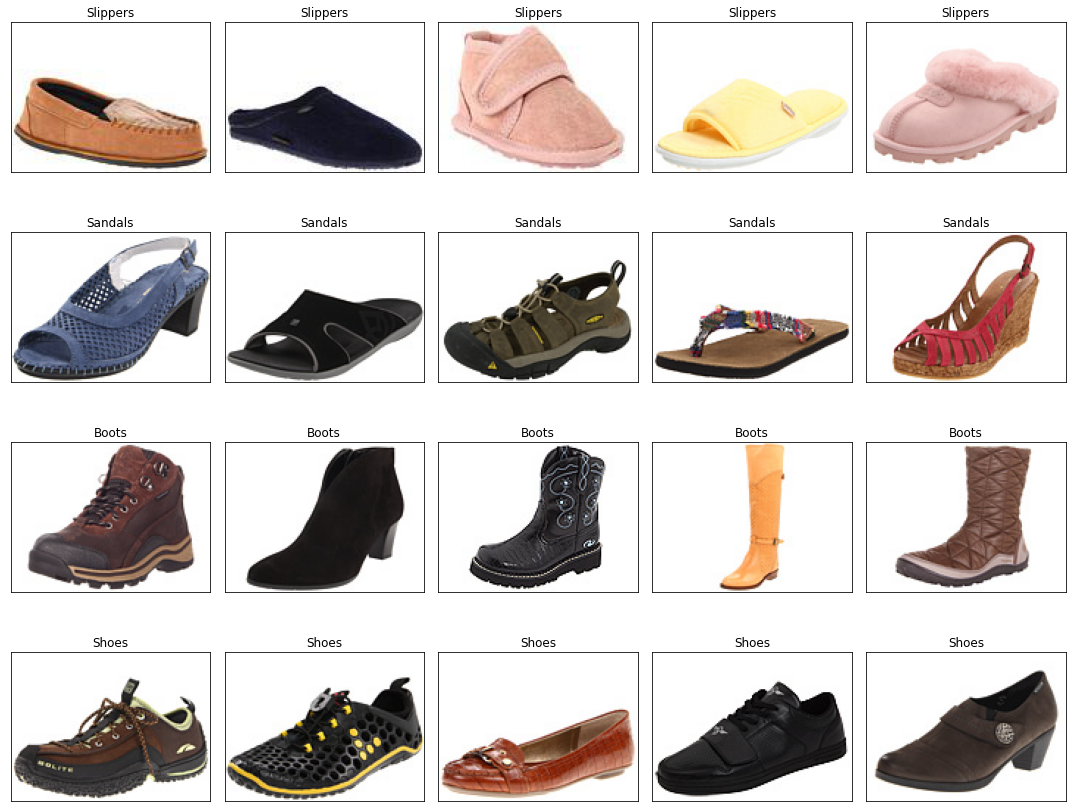

In [8]:
def visual_figure(ax, file, title):
    img = image.imread(file)
    ax.imshow(img)
    ax.title.set_text(title)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig = plt.figure(figsize=(15, 12))
axs = fig.subplots(4, 5)
for i in range(5):
    id_1 = i+count[0][1]
    id_2 = id_1+count[1][1]
    id_3 = id_2+count[2][1]
    visual_figure(axs[0,i], filenames[i], classes[i])
    visual_figure(axs[1,i], filenames[id_1], classes[id_1])
    visual_figure(axs[2,i], filenames[id_2], classes[id_2])
    visual_figure(axs[3,i], filenames[id_3], classes[id_3])
fig.tight_layout()

# Create a subset of the dataset

In [9]:
dir_name = "./data_2500"
isDir = os.path.isdir(dir_name) 
if not isDir:
    !mkdir data_2500
    !mkdir data_2500/Boots data_2500/Sandals data_2500/Shoes data_2500/Slippers
    !find data/Boots -type f -name "*.jpg" | head -2500 | xargs -d '\n' cp -t data_2500/Boots;
    !find data/Sandals -type f -name "*.jpg" | head -2500 | xargs -d '\n' cp -t data_2500/Sandals;
    !find data/Shoes -type f -name "*.jpg" | head -2500 | xargs -d '\n' cp -t data_2500/Shoes;
    !find data/Slippers -type f -name "*.jpg" | head -2500 | xargs -d '\n' cp -t data_2500/Slippers;

In [10]:
dir_name = "./data_2500"

files='**/*.jpg'
filenames = glob(os.path.join(dir_name, files))
classes = [os.path.basename(os.path.dirname(name)) for name in filenames]
count = list(Counter(classes).items())
print("Class count:", count);

Class count: [('Slippers', 2500), ('Sandals', 2500), ('Boots', 2500), ('Shoes', 2500)]


# Split the dataset to train, test and validation

In [11]:
# pip install split-folders

# split dataset into train (2000), test(250) and validation (250)
splitfolders.ratio('data_2500', output="splitted_data", seed=1337, ratio=(.8, 0.1, 0.1))